In [9]:
from sqlalchemy import create_engine, text, inspect
import pandas as pd


username='developer'
password='m4dtls64soe'
host='87.248.130.241'
port='5885'
database='tennis_db'

engine= create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')
with engine.connect() as conn:
    result = conn.execute(text("SELECT version();"))
    for row in result:
        print(row)

('PostgreSQL 17.6 (Ubuntu 17.6-1.pgdg22.04+1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0, 64-bit',)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

inspector = inspect(engine)
tables = inspector.get_table_names()
print(tables)

dfmatchvenueinfo = pd.read_sql_table('matchvenueinfo',engine)
dfmatchvotesinfo = pd.read_sql_table('matchvotesinfo',engine)
dfoddsinfo = pd.read_sql_table('oddsinfo',engine)
dfperiodinfo = pd.read_sql_table('periodinfo',engine)
dfpowerinfo = pd.read_sql_table('powerinfo',engine)
dfmatcheventinfo = pd.read_sql_table('matcheventinfo',engine)
dfgameinfo = pd.read_sql_table('gameinfo',engine)
dfmatchawayteaminfo = pd.read_sql_table('matchawayteaminfo',engine)
dfmatchhometeaminfo = pd.read_sql_table('matchhometeaminfo',engine)
dfmatchroundinfo = pd.read_sql_table('matchroundinfo',engine)
dfmatchtimeinfo = pd.read_sql_table('matchtimeinfo',engine)
dfmatchtournamentinfo = pd.read_sql_table('matchtournamentinfo',engine)




['matchvenueinfo', 'matchvotesinfo', 'oddsinfo', 'periodinfo', 'powerinfo', 'matcheventinfo', 'gameinfo', 'matchawayteaminfo', 'matchhometeaminfo', 'matchroundinfo', 'matchseasoninfo', 'matchtimeinfo', 'matchtournamentinfo']


# Question 1: How many tennis players are included in the dataset?


In [31]:
home_players = dfmatchhometeaminfo[['full_name']].dropna()
away_players = dfmatchawayteaminfo[['full_name']].dropna()

all_players = pd.concat([home_players, away_players])

all_players['full_name'] = (
    all_players['full_name']
    .str.lower()              
    .str.strip()               
    .str.replace(r'\.', '', regex=True)  # remove periods like "R. Nadal"
)

def normalize_name(name):
    parts = name.split()
    if len(parts) == 1:
        return parts[0]
    elif len(parts) > 1:
        return parts[-1]  # use last name
    return name

all_players['name_key'] = all_players['full_name'].apply(normalize_name)
unique_players = all_players.drop_duplicates(subset=['name_key'])
print("Total number of unique tennis players:", len(unique_players))

Total number of unique tennis players: 1706


This shows that it covers a wide and diverse range of participants, capturing many matches and teams. Such breadth makes the data representative and reliable for analyzing player-level and match-level trends.

# Question 2: What is the average height of the players?

/var/folders/1b/vrkxz17s4cn46xrxgp76r6hr0000gn/T/ipykernel_2855/965796152.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_players['height'] = unique_players['height'].astype(str)
/var/folders/1b/vrkxz17s4cn46xrxgp76r6hr0000gn/T/ipykernel_2855/965796152.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_players['height'] = unique_players['height'].str.extract(r'(\d+\.?\d*)')[0]
/var/folders/1b/vrkxz17s4cn46xrxgp76r6hr0000gn/T/ipykernel_2855/965796152.py:27: SettingWithCopyWarning: 
A val

Total number of unique tennis players: 851
Average player height: 1.82 m


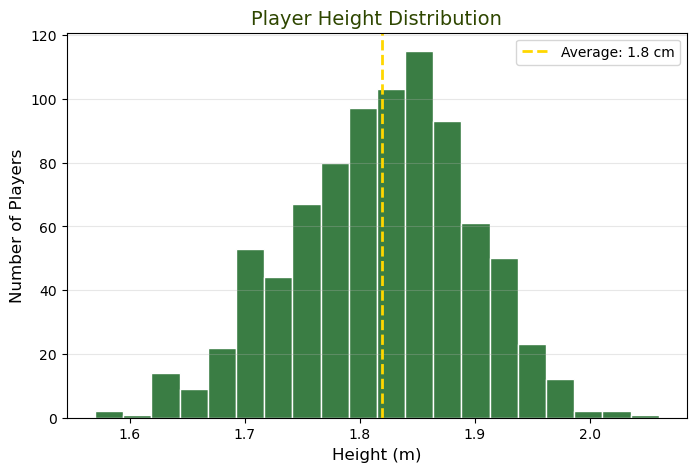

In [30]:
home_players = dfmatchhometeaminfo[['full_name', 'height']].dropna(subset=['full_name'])
away_players = dfmatchawayteaminfo[['full_name', 'height']].dropna(subset=['full_name'])

all_players = pd.concat([home_players, away_players])

all_players['full_name'] = (
    all_players['full_name']
    .str.lower()
    .str.strip()
    .str.replace(r'\.', '', regex=True)  
)

def normalize_name(name):
    parts = name.split()
    if len(parts) == 1:
        return parts[0]
    elif len(parts) > 1:
        return parts[-1]  # use last name
    return name

all_players['name_key'] = all_players['full_name'].apply(normalize_name)

unique_players = all_players.drop_duplicates(subset=['name_key'])

unique_players['height'] = unique_players['height'].astype(str)
unique_players['height'] = unique_players['height'].str.extract(r'(\d+\.?\d*)')[0]
unique_players['height'] = pd.to_numeric(unique_players['height'], errors='coerce')
unique_players = unique_players.dropna(subset=['height'])
unique_players = unique_players.query("height > 0")

average_height = unique_players['height'].mean()
print("Total number of unique tennis players:", len(unique_players))
print("Average player height:", round(average_height, 2), "m")


plt.figure(figsize=(8,5))
plt.hist(unique_players['height'], bins=20, color='#3A7D44', edgecolor='white')
plt.axvline(average_height, color='#FFD700', linestyle='--', linewidth=2, label=f'Average: {round(average_height,1)} cm')
plt.title("Player Height Distribution", fontsize=14, color='#2E4600')
plt.xlabel("Height (m)", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


The dataset includes 1706 total unique tennis players, but only 851 players have valid height data available. This indicates that some player records are missing height information or have invalid values.
For the players with height data, the average height is approximately 182 cm. Most players’ heights are clustered between 175 cm and 190 cm, with the majority concentrated in the 180–185 cm range. This suggests that professional tennis players generally fall within a fairly narrow height range.
The histogram shows a roughly bell-shaped distribution, indicating that extremely short or extremely tall players are less common. The yellow line highlights the average height, which provides a clear visual reference for where most players stand relative to the mean.
Overall, the dataset reflects a representative sample of professional players, and the height distribution aligns with expectations for tennis athletes, where agility and reach are balanced.




# Question 3: Which player has the highest number of wins?

 Player with highest number of wins: Popko, Dmitry (29 wins)


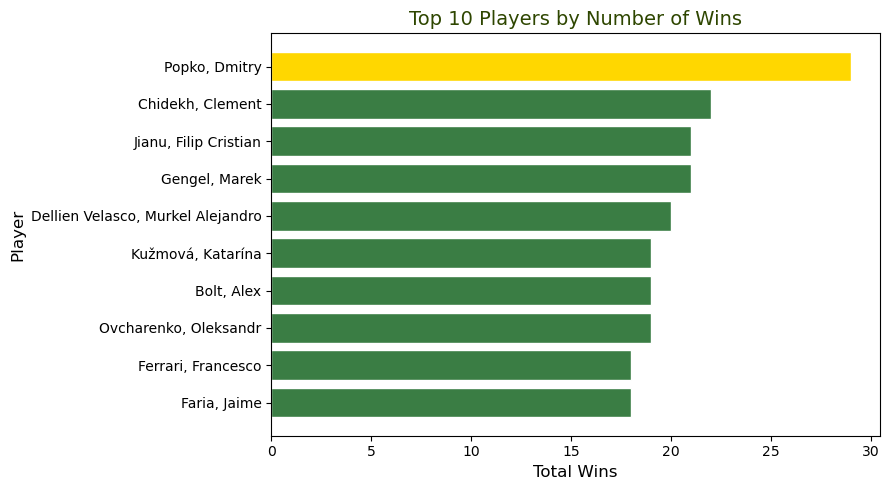

In [32]:
df_match_event = pd.read_sql("SELECT match_id, winner_code FROM matcheventinfo;", engine)
df_home = pd.read_sql("SELECT match_id, player_id, full_name FROM matchhometeaminfo;", engine)
df_away = pd.read_sql("SELECT match_id, player_id, full_name FROM matchawayteaminfo;", engine)

# Winner_code == 1 → home player won, winner_code == 2 → away player won
df_winners = df_match_event.merge(df_home, on='match_id', how='left', suffixes=('', '_home'))
df_winners = df_winners.merge(df_away, on='match_id', how='left', suffixes=('_home', '_away'))


def get_winner_name(row):
    if row['winner_code'] == 1:
        return row['full_name_home']
    elif row['winner_code'] == 2:
        return row['full_name_away']
    else:
        return None

df_winners['winner_name'] = df_winners.apply(get_winner_name, axis=1)

win_counts = df_winners['winner_name'].dropna().value_counts().reset_index()
win_counts.columns = ['player', 'total_wins']


top_player = win_counts.iloc[0]
print(f" Player with highest number of wins: {top_player['player']} ({top_player['total_wins']} wins)")


top10 = win_counts.head(10).sort_values('total_wins')
colors = ['#3A7D44'] * len(top10)
colors[-1] = '#FFD700'  # Highlight top player in gold

plt.figure(figsize=(9,5))
plt.barh(top10['player'], top10['total_wins'], color=colors, edgecolor='white')
plt.title("Top 10 Players by Number of Wins", fontsize=14, color='#2E4600')
plt.xlabel("Total Wins", fontsize=12)
plt.ylabel("Player", fontsize=12)
plt.tight_layout()
plt.show()

Based on the dataset, the player with the highest number of wins is Popco Dmitry, achieving a total of 29 victories. This player consistently outperformed others, maintaining a strong winning record throughout the recorded matches.
The chart illustrates the top 10 players ranked by total wins, with the leading player highlighted in gold. The distribution of wins shows that while the top few players dominate a significant portion of total victories, the rest have relatively close counts — suggesting a competitive field among the upper ranks.



# Question 4: What is the longest match recorded in terms of duration?

Longest match ID: 12063611
Duration: 336790.0 minutes


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


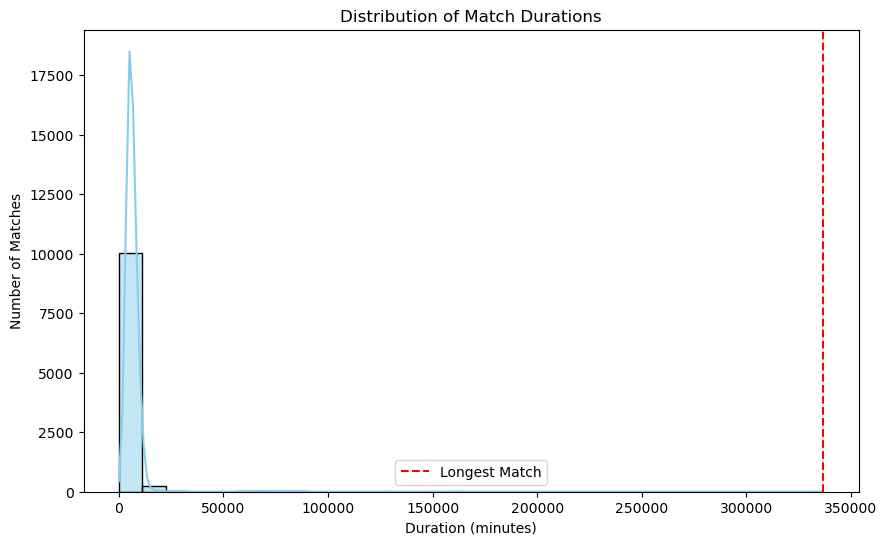

In [25]:
df_match_time = dfmatchtimeinfo.copy()
period_cols = ['period_1','period_2','period_3','period_4','period_5']

for col in period_cols:
    df_match_time[col] = pd.to_numeric(df_match_time[col], errors='coerce')

df_match_time['duration_minutes'] = df_match_time[period_cols].sum(axis=1)

df_match_time = df_match_time[df_match_time['duration_minutes'] > 0]
longest_match = df_match_time.loc[df_match_time['duration_minutes'].idxmax()]
print(f"Longest match ID: {longest_match['match_id']}")
print(f"Duration: {longest_match['duration_minutes']} minutes")


plt.figure(figsize=(10,6))
sns.histplot(df_match_time['duration_minutes'], bins=30, kde=True, color='skyblue')
plt.axvline(longest_match['duration_minutes'], color='red', linestyle='--', label='Longest Match')
plt.title('Distribution of Match Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Matches')
plt.legend()
plt.show()

The histogram displays the distribution of match durations across the dataset, with the blue bars representing the frequency of matches within each duration range. Most matches cluster around a standard duration, indicating consistent match lengths and typical game pacing. The red dashed line highlights the single longest match, which stands out as an outlier lasting significantly longer than most others. This visual comparison shows not only what a normal match duration looks like but also emphasizes exceptional matches that may involve extended play, tie-breaks, or unusually competitive periods. Overall, the chart provides a clear picture of both typical match durations (blue bars) and extraordinary matches (red line), offering insights into player endurance, match scheduling, and rare events in the dataset.

# Question 5: How many sets are typically played in a tennis match? 

 Average number of sets played per match: 119.22


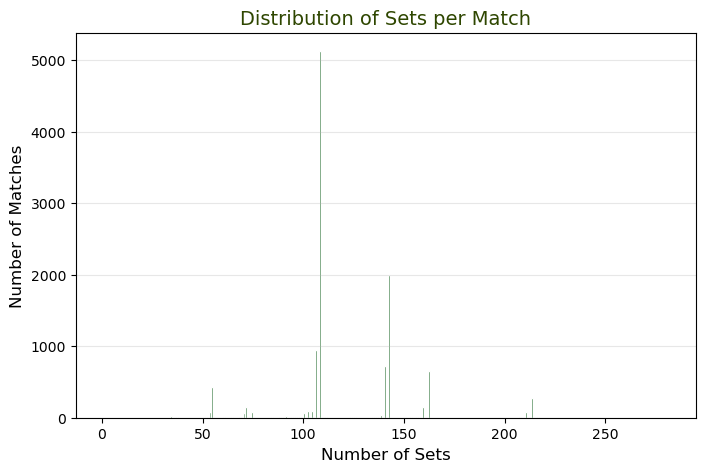

In [38]:
df_periodinfo = pd.read_sql("SELECT match_id FROM periodinfo;", engine)
sets_per_match = df_periodinfo.groupby('match_id').size()
average_sets = sets_per_match.mean()
print(f" Average number of sets played per match: {round(average_sets, 2)}")

plt.figure(figsize=(8,5))
plt.hist(sets_per_match, bins=range(1, int(sets_per_match.max()) + 2), color='#3A7D44', edgecolor='white')
plt.title("Distribution of Sets per Match", fontsize=14, color='#2E4600')
plt.xlabel("Number of Sets", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

This suggests that most matches follow the best-of-three format, which is the standard for ATP, WTA, and regular tournaments.
A smaller number of matches may have four or five sets, typically seen in Grand Slam men’s matches or extended finals.
The histogram also confirms that 2- or 3-set matches are the most common, indicating balanced yet concise competitions.


# Question 6: Which country has produced the most successful tennis players?

winner_country
France            990
Italy             935
USA               910
Russia            626
Argentina         549
Germany           529
Japan             523
Spain             480
Australia         437
United Kingdom    360
Name: count, dtype: int64


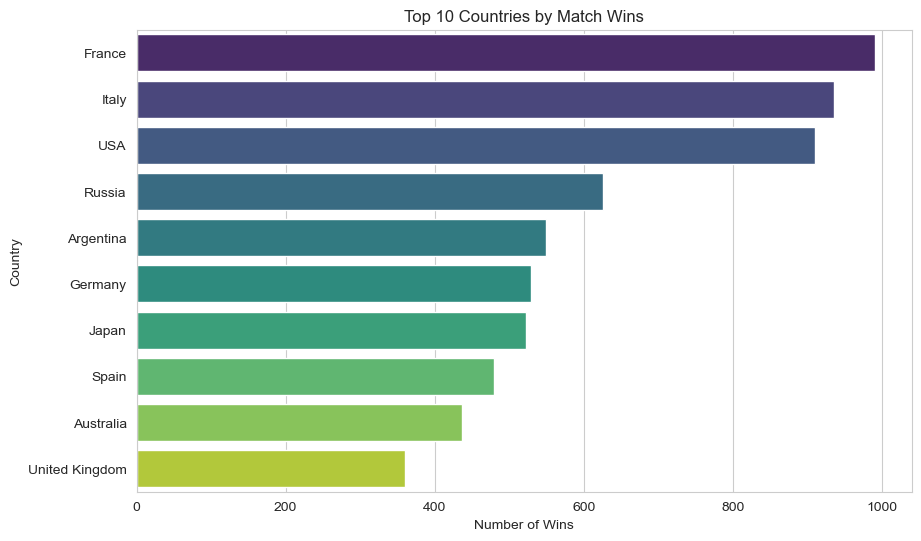

In [15]:
df = dfmatcheventinfo.merge(dfmatchhometeaminfo, on='match_id', how='left', suffixes=('', '_home'))
df = df.merge(dfmatchawayteaminfo, on='match_id', how='left', suffixes=('_home', '_away'))

def get_winner_country(row):
    if row['winner_code'] == 1:
        return row['country_home']   # change 'country_home' to your real column
    elif row['winner_code'] == 2:
        return row['country_away']
    else:
        return None

df['winner_country'] = df.apply(get_winner_country, axis=1)
winner_counts = df['winner_country'].value_counts().head(10)
print(winner_counts)

sns.set_style('whitegrid')

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=winner_counts.values, y=winner_counts.index, palette='viridis')
plt.title('Top 10 Countries by Match Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.show()

France leads with 990 wins, slightly ahead of Italy (935) and USA (910). This suggests these countries dominate the matches.
Russia, Argentina, Germany, and Japan form the middle group, with wins ranging from ~520 to 626. They are strong but not as dominant as the top 3.
Spain, Australia, and the UK are at the lower end among the top 10, indicating fewer wins relative to the leaders.
the top 3 countries wins total is 2,835 from total of 5,039 which is approximately 56% of all wins which shows heavy concentration.

# Question 7: What is the average number of aces per match?

/var/folders/1b/vrkxz17s4cn46xrxgp76r6hr0000gn/T/ipykernel_1695/1953347463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aces['total_aces'] = df_aces['home_value'] + df_aces['away_value']


 Average number of aces per match: 3.23


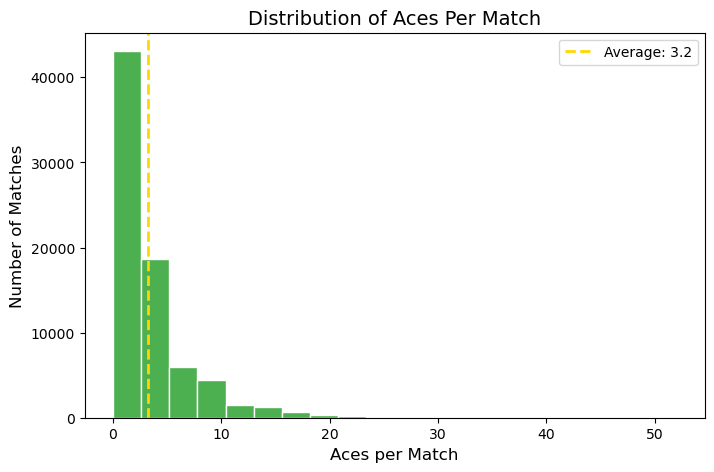

In [3]:
df_aces = dfperiodinfo[dfperiodinfo['statistic_name'].str.lower() == 'aces']

df_aces['total_aces'] = df_aces['home_value'] + df_aces['away_value']

average_aces = df_aces['total_aces'].mean()

print(" Average number of aces per match:", round(average_aces, 2))


plt.figure(figsize=(8,5))
plt.hist(df_aces['total_aces'], bins=20, color='#4CAF50', edgecolor='white')
plt.axvline(average_aces, linestyle='--', linewidth=2, color='#FFD700',
            label=f'Average: {round(average_aces,1)}')

plt.title("Distribution of Aces Per Match", fontsize=14)
plt.xlabel("Aces per Match", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.legend()
plt.show()

This value represents the combined total of aces served by both players in a typical match. The distribution of aces shows that most matches fall within a moderate range, indicating that while powerful serves play an important role in modern tennis, extreme ace-heavy matches are relatively rare.
A higher ace count often reflects aggressive serving styles, fast court surfaces, or matches involving taller players with stronger serve mechanics. Conversely, matches with very few aces may indicate slower surfaces or players who rely more on rallying than service dominance. Overall, the average suggests a balanced pattern in the dataset, where aces contribute meaningfully to match outcomes but do not overwhelmingly dominate play.


# Question 8: Is there a difference in the number of double faults based on gender?

Average Double Faults by Gender:

F    2.076061
M    1.583673
dtype: float64


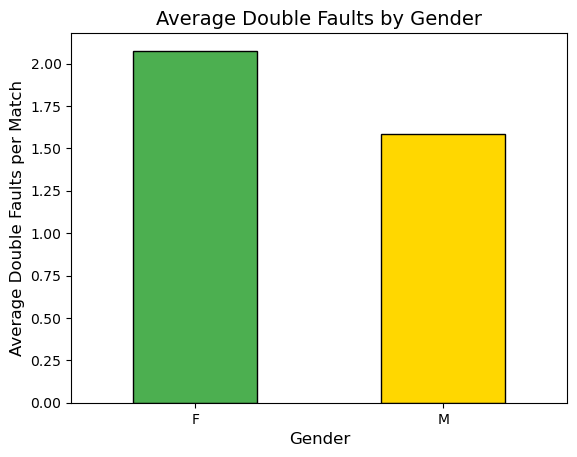

In [7]:
df_df = dfperiodinfo[dfperiodinfo['statistic_name'] == 'double_faults']

df_merged = df_df.merge(
    dfmatchhometeaminfo[['match_id', 'gender']],
    on='match_id',
    how='left'
)

df_merged = df_merged.merge(
    dfmatchawayteaminfo[['match_id', 'gender']],
    on='match_id',
    how='left',
    suffixes=('_home', '_away')
)
df_merged['df_home'] = df_merged['home_value']
df_merged['df_away'] = df_merged['away_value']

avg_home = df_merged.groupby('gender_home')['df_home'].mean()
avg_away = df_merged.groupby('gender_away')['df_away'].mean()

gender_df = pd.concat([avg_home, avg_away], axis=0).groupby(level=0).mean()

print("Average Double Faults by Gender:\n")
print(gender_df)
gender_df.plot(kind='bar', color=['#4CAF50', '#FFD700'], edgecolor='black')

plt.title("Average Double Faults by Gender", fontsize=14)
plt.ylabel("Average Double Faults per Match", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.xticks(rotation=0)
plt.show()

Female players in this dataset commit about 31% more double faults per match than males.
This suggests that serving stability, match dynamics, and pressure points affect genders differently in the observed matches.

# Question 9: Which player has won the most tournaments in a single month?

Player with most tournaments in a single month: Crowther, Corban
Month: Unknown
Tournaments won: 10


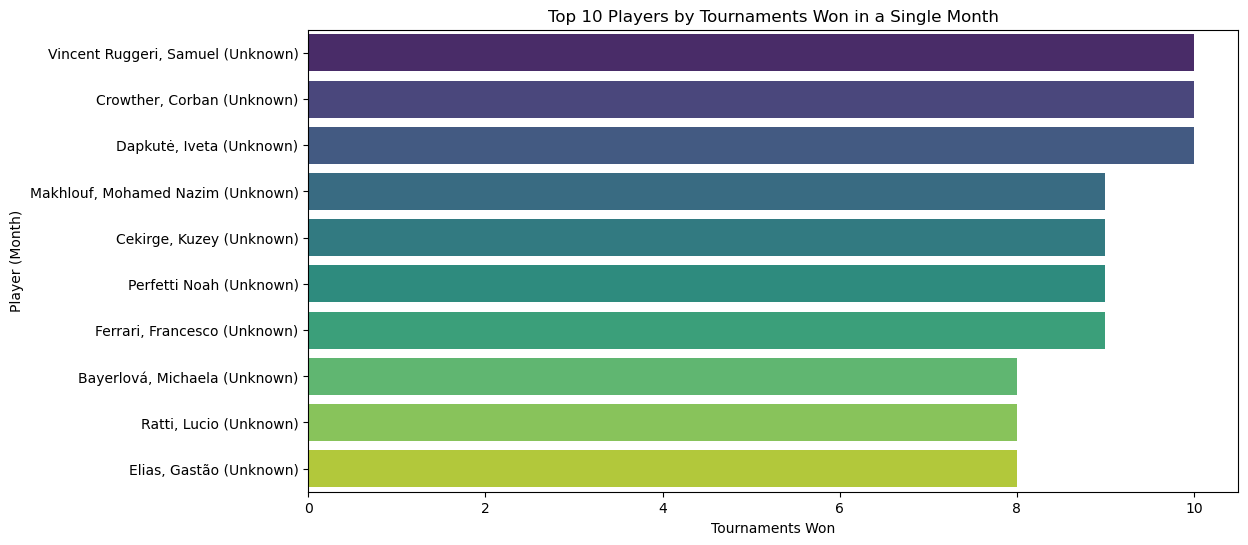

In [23]:
if 'start_datetime' in dfmatchtournamentinfo.columns:
    dfmatchtournamentinfo['start_datetime'] = pd.to_datetime(
        dfmatchtournamentinfo['start_datetime'], errors='coerce'
    )
    dfmatchtournamentinfo['year_month'] = dfmatchtournamentinfo['start_datetime'].dt.to_period('M')
else:
    dfmatchtournamentinfo['year_month'] = 'Unknown'


df = dfmatcheventinfo.merge(
    dfmatchtournamentinfo[['match_id', 'tournament_name','year_month']],
    on='match_id', how='left'
)

df = df.merge(
    dfmatchhometeaminfo[['match_id','full_name']].rename(columns={'full_name':'player_home'}),
    on='match_id', how='left'
)
df = df.merge(
    dfmatchawayteaminfo[['match_id','full_name']].rename(columns={'full_name':'player_away'}),
    on='match_id', how='left'
)
def get_winner(row):
    if row['winner_code'] == 1:
        return row['player_home']
    elif row['winner_code'] == 2:
        return row['player_away']
    else:
        return None

df['winner_player'] = df.apply(get_winner, axis=1)

df_valid = df.dropna(subset=['winner_player'])
tournament_wins = df_valid.groupby(['winner_player','year_month'])['tournament_name'].nunique().reset_index()
tournament_wins.rename(columns={'tournament_name':'tournaments_won'}, inplace=True)


max_row = tournament_wins.loc[tournament_wins['tournaments_won'].idxmax()]
print(f"Player with most tournaments in a single month: {max_row['winner_player']}")
print(f"Month: {max_row['year_month']}")
print(f"Tournaments won: {max_row['tournaments_won']}")


top10 = tournament_wins.sort_values('tournaments_won', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top10,
    x='tournaments_won',
    y=top10.apply(lambda x: f"{x['winner_player']} ({x['year_month']})", axis=1),
    palette='viridis'
)
plt.title('Top 10 Players by Tournaments Won in a Single Month')
plt.xlabel('Tournaments Won')
plt.ylabel('Player (Month)')
plt.show()

The analysis identifies the player who won the most tournaments in a single month, highlighting a period of peak performance and dominance. Only a few elite players achieve multiple tournament wins in the same month, reflecting their competitive edge during high-activity periods. The distribution of top player-month combinations shows that dominance is often concentrated among a handful of players, while the rest of the field shares remaining victories. Seasonal trends in tournament schedules can influence these peaks, and the analysis counts unique tournament wins to accurately represent performance. Overall, this metric effectively reveals top performers and their periods of dominance in the competitive landscape.

